<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-06-01 13:56:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  24.4MB/s    in 1.4s    

2023-06-01 13:56:23 (24.4 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


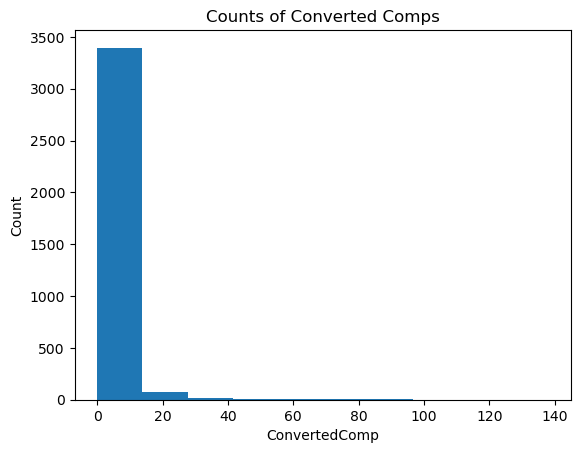

In [9]:
# your code goes here
QUERY = """
SELECT
COUNT(ConvertedComp) 
FROM master
GROUP BY ConvertedComp
ORDER BY ConvertedComp"""
df2= pd.read_sql_query(QUERY,conn)
df2.plot(kind='hist', title='Counts of Converted Comps', legend=False)
plt.xlabel('ConvertedComp')
plt.ylabel('Count')
plt.show()

### Box Plots


Plot a box plot of `Age.`


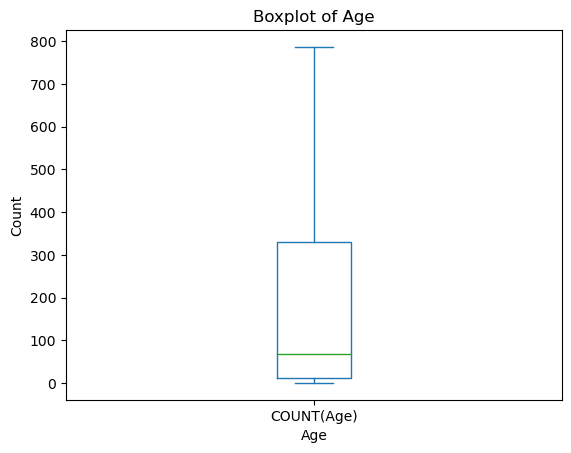

In [10]:
# your code goes here
QUERY = """
SELECT
COUNT(Age) 
FROM master
GROUP BY Age
ORDER BY Age"""
df2= pd.read_sql_query(QUERY,conn)
df2.plot(kind='box', title='Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


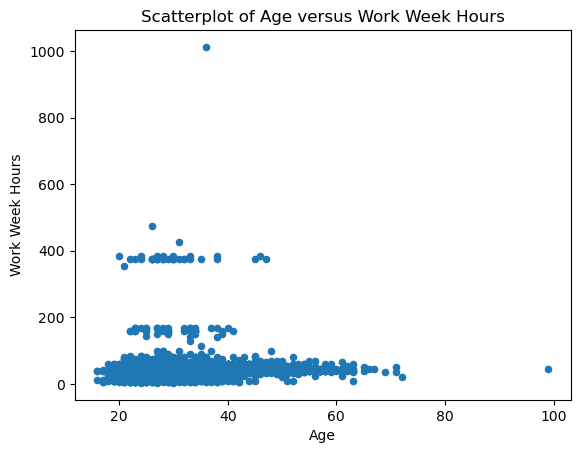

In [11]:
# your code goes here
QUERY = """
SELECT
Age,WorkWeekHrs
FROM master
"""
df2= pd.read_sql_query(QUERY,conn)
df2.plot.scatter(x='Age', y='WorkWeekHrs', title='Scatterplot of Age versus Work Week Hours')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


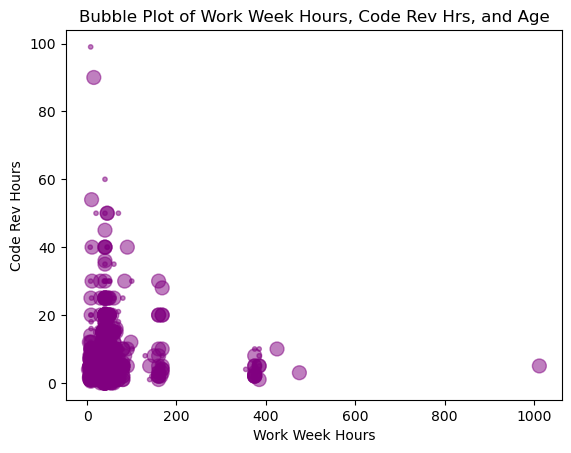

In [12]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df2= pd.read_sql_query(QUERY,conn)
df2.plot.scatter(x='WorkWeekHrs', y='CodeRevHrs', s='Age', title='Bubble Plot of Work Week Hours, Code Rev Hrs, and Age', color='purple',alpha=0.5, legend=True, sizes=(10, 100))
plt.xlabel('Work Week Hours')
plt.ylabel('Code Rev Hours')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [13]:
QUERY="""
select count(DatabaseDesireNextYear) as Count,DatabaseDesireNextYear from DatabaseDesireNextYear 
group by DatabaseDesireNextYear 
order by count(DatabaseDesireNextYear) DESC LIMIT 5
"""
df2=pd.read_sql_query(QUERY,conn)
df2.set_index('DatabaseDesireNextYear',inplace=True)
df2

,Count
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


<AxesSubplot:title={'center':'Database Desired Next Year'}>

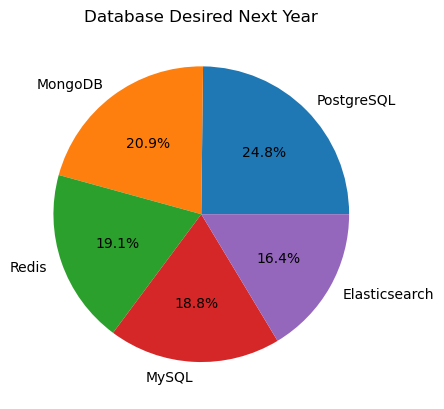

In [14]:
# your code goes here
QUERY="""
select *
from DatabaseDesireNextYear
"""
df2 = pd.read_sql_query(QUERY,conn)
df3=pd.DataFrame(df2["DatabaseDesireNextYear"].value_counts(),columns=['DatabaseDesireNextYear'])
df3b=df3.head()
df3b.plot.pie(y='DatabaseDesireNextYear', legend=False, autopct='%1.1f%%', title='Database Desired Next Year', ylabel='')

In [15]:
QUERY="""
select count(LanguageWorkedWith) as Count,LanguageWorkedWith from LanguageWorkedWith
group by LanguageWorkedWith
order by count(LanguageWorkedWith) DESC LIMIT 5
"""
df2=pd.read_sql_query(QUERY,conn)
df2.set_index('LanguageWorkedWith',inplace=True)
df2

,Count
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542


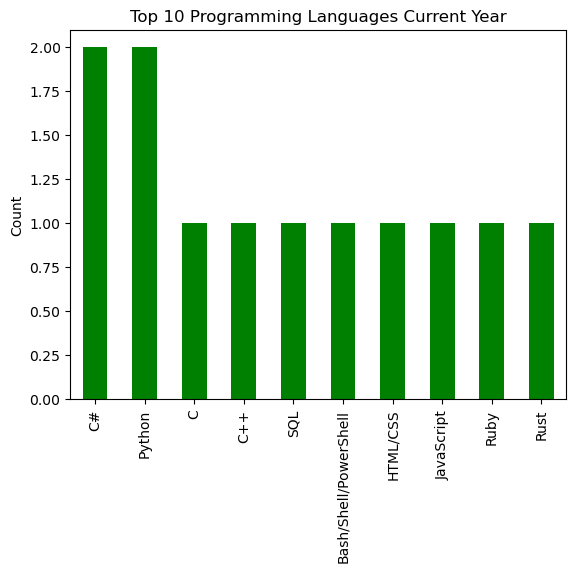

In [37]:
QUERY="""
select*
FROM LanguageWorkedWith DESC Limit 12
"""
df2 = pd.read_sql_query(QUERY,conn)
df6=pd.DataFrame(df2["LanguageWorkedWith"].value_counts(),columns=['LanguageWorkedWith'])
df6.plot.bar(y='LanguageWorkedWith', legend=False, title='Top 10 Programming Languages Current Year', ylabel='Count', color='green')
plt.show()

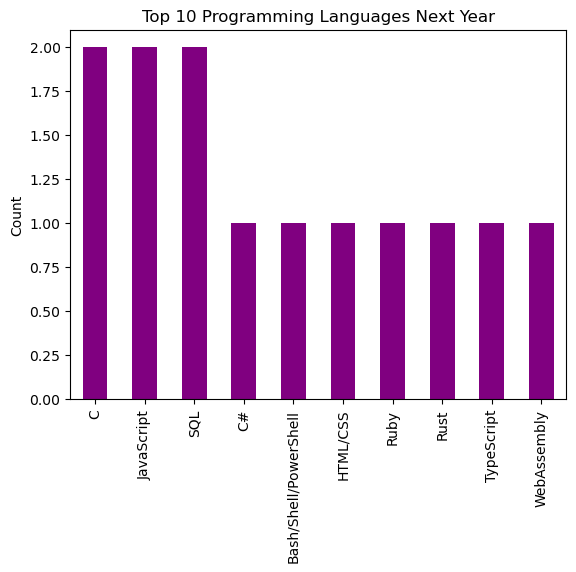

In [38]:
QUERY="""
select *
from LanguageDesireNextYear DESC Limit 13
"""
df2 = pd.read_sql_query(QUERY,conn)
df3=pd.DataFrame(df2["LanguageDesireNextYear"].value_counts(),columns=['LanguageDesireNextYear'])
df3.plot.bar(y='LanguageDesireNextYear', legend=False, title='Top 10 Programming Languages Next Year', ylabel='Count', color='purple')
plt.show()

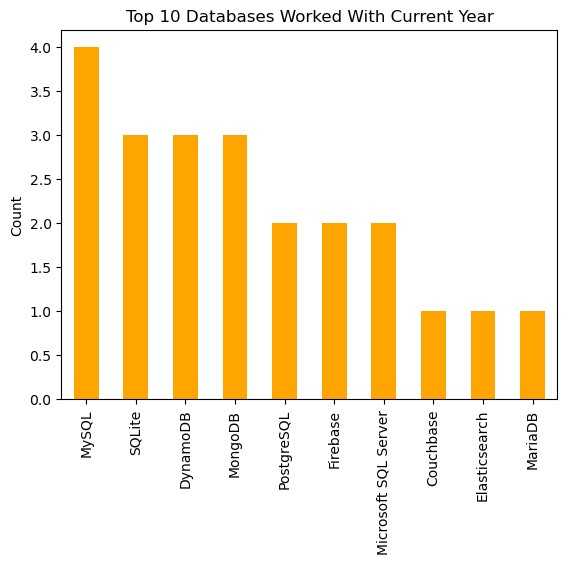

In [41]:
QUERY="""
select*
FROM DatabaseWorkedWith DESC Limit 22
"""
df2 = pd.read_sql_query(QUERY,conn)
df6=pd.DataFrame(df2["DatabaseWorkedWith"].value_counts(),columns=['DatabaseWorkedWith'])
df6.plot.bar(y='DatabaseWorkedWith', legend=False, title='Top 10 Databases Worked With Current Year', ylabel='Count', color='Orange')
plt.show()

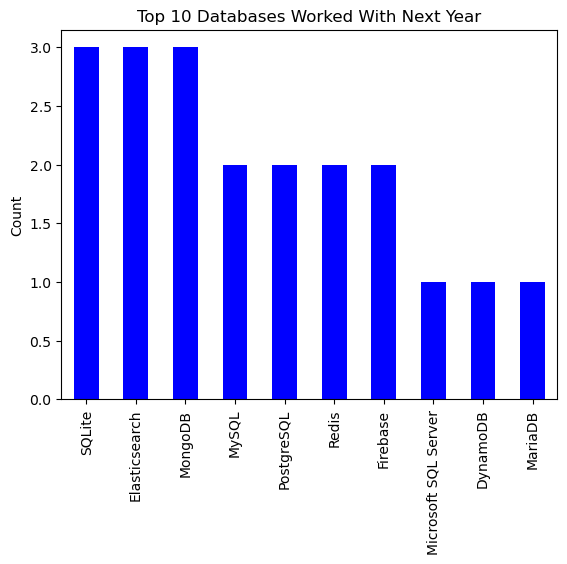

In [43]:
QUERY="""
select*
FROM DatabaseDesireNextYear DESC LIMIT 20
"""
df2 = pd.read_sql_query(QUERY,conn)
df6=pd.DataFrame(df2["DatabaseDesireNextYear"].value_counts(),columns=['DatabaseDesireNextYear'])
df6.plot.bar(y='DatabaseDesireNextYear', legend=False, title='Top 10 Databases Worked With Next Year', ylabel='Count', color='Blue')
plt.show()

In [180]:
QUERY = """
SELECT DatabaseWorkedWith, count(Respondent)
from DatabaseWorkedWith Group by Respondent
"""
df=pd.read_sql_query(QUERY,conn)
print(df)

         DatabaseWorkedWith  count(Respondent)
0                     MySQL                  2
1                  DynamoDB                  3
2                 Couchbase                  4
3                   MongoDB                  3
4                   MongoDB                  2
...                     ...                ...
10940  Microsoft SQL Server                  1
10941                 MySQL                  1
10942            PostgreSQL                  1
10943  Microsoft SQL Server                  2
10944            PostgreSQL                  1

[10945 rows x 2 columns]


In [179]:
QUERY = """
SELECT DatabaseWorkedWith, count(Respondent)
from DatabaseWorkedWith where DatabaseWorkedWith Not Like "MySQL" Group by Respondent
"""
df=pd.read_sql_query(QUERY,conn)
print(df)

         DatabaseWorkedWith  count(Respondent)
0                    SQLite                  1
1                  DynamoDB                  3
2                 Couchbase                  3
3                   MongoDB                  2
4                   MongoDB                  2
...                     ...                ...
10466  Microsoft SQL Server                  3
10467  Microsoft SQL Server                  1
10468            PostgreSQL                  1
10469  Microsoft SQL Server                  2
10470            PostgreSQL                  1

[10471 rows x 2 columns]


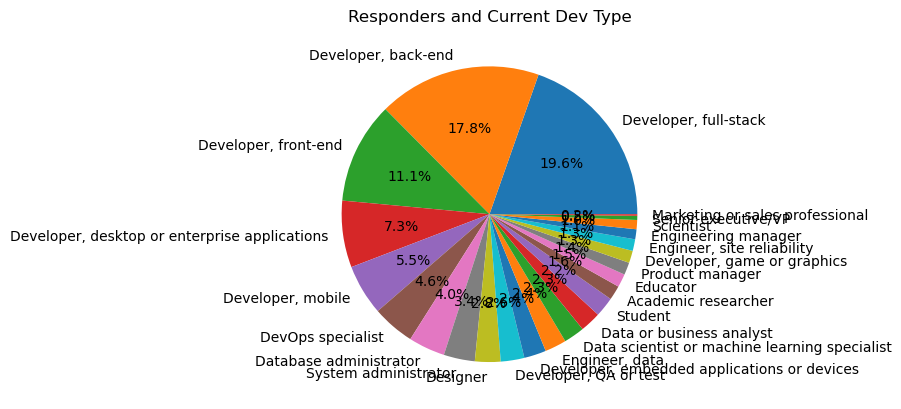

In [22]:
# your code goes here
QUERY="""
select *
from DevType DESC
"""
df2 = pd.read_sql_query(QUERY,conn)
df4=pd.DataFrame(df2["DevType"].value_counts(),columns=['DevType'])
df4.plot.pie(y='DevType', legend=False, autopct='%1.1f%%', title='Responders and Current Dev Type', ylabel='')
plt.show()

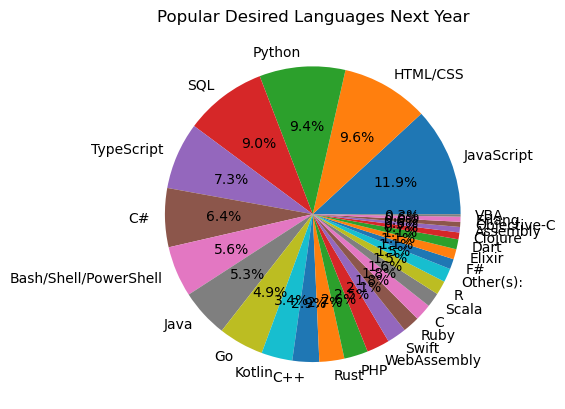

In [21]:
# your code goes here
QUERY="""
select *
from LanguageDesireNextYear DESC  
"""
df2 = pd.read_sql_query(QUERY,conn)
df3=pd.DataFrame(df2["LanguageDesireNextYear"].value_counts(),columns=['LanguageDesireNextYear'])
df3.plot.pie(y='LanguageDesireNextYear', legend=False, autopct='%1.1f%%', title='Popular Desired Languages Next Year', ylabel='')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


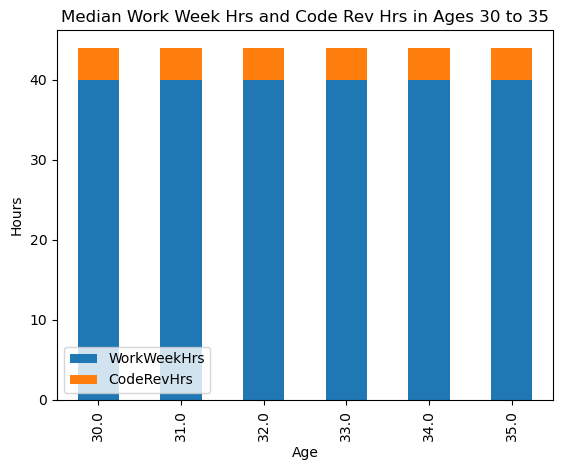

In [174]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df2 = pd.read_sql_query(QUERY,conn)
df3=df2.groupby('Age').median()
df3.plot(kind='bar', stacked=True, title='Median Work Week Hrs and Code Rev Hrs in Ages 30 to 35')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


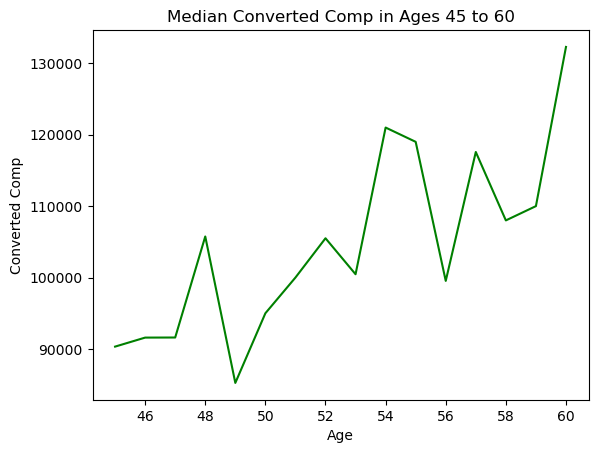

In [194]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df2 = pd.read_sql_query(QUERY,conn)
df3=df2.groupby('Age').median()
df3.plot.line(title='Median Converted Comp in Ages 45 to 60', legend=False, color='green')
plt.xlabel('Age')
plt.ylabel('Converted Comp')
plt.show()

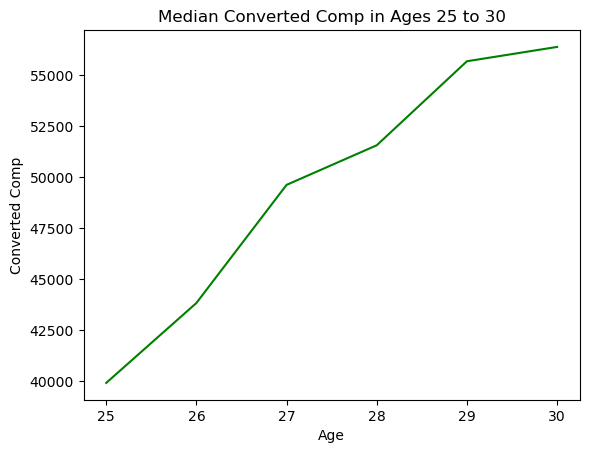

In [15]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 25 AND 30
"""
df2 = pd.read_sql_query(QUERY,conn)
df5=df2.groupby('Age').median()
df5.plot.line(title='Median Converted Comp in Ages 25 to 30', legend=False, color='green')
plt.xlabel('Age')
plt.ylabel('Converted Comp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


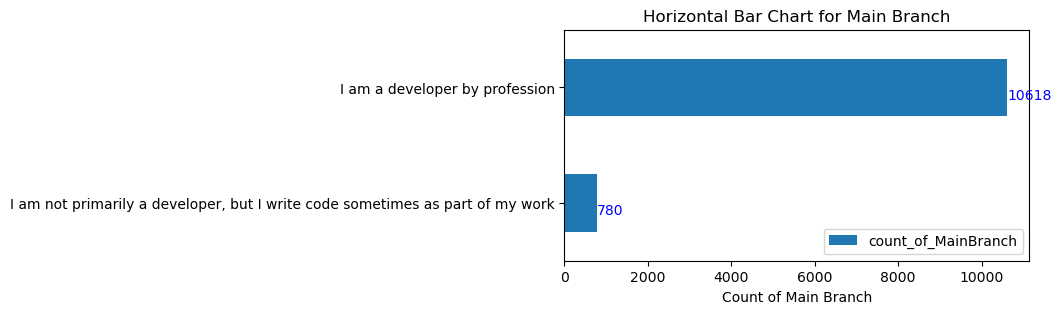

In [15]:
QUERY = """
SELECT MainBranch,COUNT(MainBranch) as count_of_MainBranch
FROM master
group by MainBranch
order by count_of_MainBranch
"""
df = pd.read_sql_query(QUERY,conn)
ax = df.plot.barh(figsize=(6, 3))
plt.xlabel('Count of Main Branch')
plt.title('Horizontal Bar Chart for Main Branch') 
ax.set_yticklabels(df['MainBranch'])   
for i, v in enumerate(df['count_of_MainBranch']):
    ax.text(v + 3, i - 0.1, str(v), color='blue')  
plt.show()

Close the database connection.


In [16]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
